## Tackling overfitting via regularization

Overfitting is a problem where a model performs well on training data but does not generalize well to unseen data(test data)
If a model suffers from overfitting,we also say that the model has a high variance,which can be caused by having too many 
parameters that lead to a model that is too complex..


Similarly our model can suffer from underfitting(high bias) which means that model is not complex enough to capture the 
pattern in the training data well and therefore also suffer from low performance on test data(unseen data)

<img src="images/overfit.png" width='60%' height='60%'/>

### Regulaization:a way to reduce overfitting or to tune the complexity of the model

Regularization is a important technique in machine learning to prevent overfitting(model is too trained on training data and 
it does not generalize well on new data).

there are two types of regulaization:L1 and L2

L1 is the sum of the absolute value of the weights


L2 is the sum of the square of the weights

### for regulaization to work properly,we need to ensure that all our features are on same scale,
### that's why feature scaling is important

the cost function for logistic regression can be regularized by adding a simple regularization term,which will shrink the
weights during model training

<img src='images/cost_f.png' width='60%' height='60%'/>

Via the regularization parameter **lambda**, we can then control how well we fit the training data while keeping the weights small. By increasing the value of **lambda**, we increase the regularization strength.

The term C is directly related to the regularization parameter **lambda** which is its inverse. Consequently, decreasing the value of the inverse regularization parameter C means that we are increasing the regularization strength,

which we can visualize by plotting the L2-regularization path for the two weight coefficients

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

In [4]:
X = iris.data[:,2:]
y = iris.target

In [5]:
X.shape

(150, 2)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()
x_std=sc.fit_transform(X)

In [8]:
from sklearn.linear_model import LogisticRegression

In [12]:
import matplotlib.pyplot as plt
import numpy as np

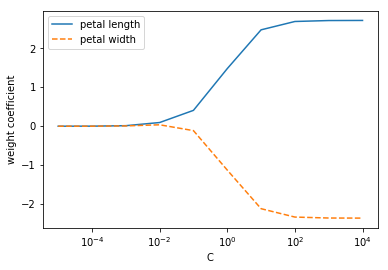

In [13]:
weights, params = [], [] 
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1) 
    lr.fit(x_std, y)
    weights.append(lr.coef_[1])
    params.append(10.**c) 
weights = np.array(weights)
plt.plot(params, weights[:, 0],label='petal length') 
plt.plot(params, weights[:, 1], linestyle='--',label='petal width')
plt.ylabel('weight coefficient') 
plt.xlabel('C')
plt.legend(loc='upper left') 
plt.xscale('log')
plt.show() 

we fitted ten logistic regression models with different values for the inverse-regularization parameter C. 
if we decrease parameter C, this will increase the regularization strength

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=10)

sc= StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [20]:
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1) 
    lr.fit(X_train_std, y_train)
    print ('train:',lr.score(X_train_std,y_train))
    print ('test:',lr.score(X_test_std,y_test))
    print ('C:',10.0**c)
    print ()

train: 0.6916666666666667
test: 0.5666666666666667
C: 1e-05

train: 0.6916666666666667
test: 0.5666666666666667
C: 0.0001

train: 0.6916666666666667
test: 0.5666666666666667
C: 0.001

train: 0.6916666666666667
test: 0.5666666666666667
C: 0.01

train: 0.7333333333333333
test: 0.6
C: 0.1

train: 0.8833333333333333
test: 0.9
C: 1.0

train: 0.9416666666666667
test: 1.0
C: 10.0

train: 0.95
test: 1.0
C: 100.0

train: 0.95
test: 1.0
C: 1000.0

train: 0.95
test: 1.0
C: 10000.0

